# In this notebook, I'll be using a dataset of 10,000 restaurants and the CDC's suicide statistics data from 2017 to see if there is any correlation between the number of fast food restaurants in a state and the rate of suicide in that state.

## A word of caution: in the middle of this exploration, I realized that the data I have used here is insufficient to actually answer this question. So below is really just a combination of me doing data analysis practice and reminding myself to use statistics with caution :)

### It is important to note that the 'rate' of suicide in a state is the number of suicides per 100,000 total population. So even though, for example, California has a relatively low rate of 10.5 to Utah's 22.7, California had 4,312 deaths to Utah's 663.

In [3]:
import pandas as pd

s_rates = pd.read_csv('SUICIDE2017.csv')

In [4]:
s_rates.head()

,STATE,RATE,DEATHS,URL
0,AL,16.6,836,/nchs/pressroom/states/alabama/alabama.htm
1,AK,27.0,200,/nchs/pressroom/states/alaska/alaska.htm
2,AZ,18.2,"1,327",/nchs/pressroom/states/arizona/arizona.htm
3,AR,20.8,631,/nchs/pressroom/states/arkansas/arkansas.htm
4,CA,10.5,"4,312",/nchs/pressroom/states/california/california.htm


In [5]:
fast_food = pd.read_csv('Datafiniti_Fast_Food_Restaurants.csv')

In [6]:
fast_food.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


### This is just a sanity check that the 'Province' column of the fast food dataset is indeed the state.

In [11]:
len(fast_food['province'].value_counts())

50

### Sadly, just looking at the value_counts tells me that this dataset won't be enough for a meaningful analysis of what I want to know -- I'm pretty sure that Alaska has more than 6 fast food restaurants!

#### Ah well. Onward I charge. If nothing else, it's good data viz. practice, and a good reminder to always be thinking about what my data actually means.

In [14]:
fast_food['province'].value_counts()

CA    1201
TX     811
FL     621
OH     522
GA     420
IL     405
PA     383
MI     374
NY     352
AZ     330
TN     302
NC     295
IN     254
VA     253
MA     205
LA     202
MN     199
WA     196
WI     189
SC     188
MD     172
KY     166
OK     166
MO     163
OR     154
CO     148
NJ     129
NV     121
IA     115
AR     102
NE      87
NM      78
KS      74
WV      70
UT      63
MS      55
CT      53
ID      51
DE      44
SD      42
MT      38
ND      35
NH      34
HI      32
WY      29
ME      25
AK      16
RI      15
VT      15
AL       6
Name: province, dtype: int64

In [23]:
df = s_rates.set_index('STATE')
df['fast_food'] = fast_food['province'].value_counts()
df.head()

,RATE,DEATHS,URL,fast_food
STATE,,,,
AL,16.6,836,/nchs/pressroom/states/alabama/alabama.htm,6
AK,27.0,200,/nchs/pressroom/states/alaska/alaska.htm,16
AZ,18.2,"1,327",/nchs/pressroom/states/arizona/arizona.htm,330
AR,20.8,631,/nchs/pressroom/states/arkansas/arkansas.htm,102
CA,10.5,"4,312",/nchs/pressroom/states/california/california.htm,1201


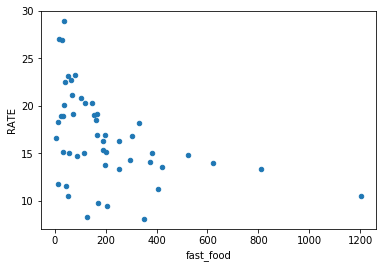

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot.scatter('fast_food', 'RATE')

# So it would appear that states with more fast food restaurants have a lower suicide rate! Therefore we should open up as many fast food joints as we can, right?
## Not necessarily, Drake. Statistic responsibly, please.

## I was about to plot the same with the 'Deaths' column, but then I discovered I have a little cleaning to do.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, AL to WY
Data columns (total 4 columns):
RATE         50 non-null float64
DEATHS       50 non-null object
URL          50 non-null object
fast_food    50 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [38]:
df['DEATHS'].head()

STATE
AL      836
AK      200
AZ    1,327
AR      631
CA    4,312
Name: DEATHS, dtype: object

In [39]:
df['DEATHS'] = df['DEATHS'].str.replace(',', '').astype(int)

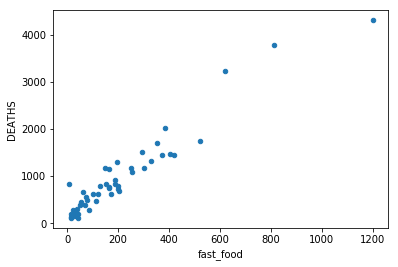

In [40]:
df.plot.scatter('fast_food', 'DEATHS')

# WARNING: This is how graphs/statistics can easily be used to mislead!

## This graph suggests that as we increase the number of fast food restaurants in a state, the number of suicide deaths increases.

## In a sense, this is true. The number of fast food restaurants in a state _appears_ to be _correlated_ with the number of suicides. BUT _this does not in any way_ mean that fast food restaurants _cause_ more suicides. This only indicates that a) the data I've used here is insufficient (as I noted above) and b) bigger states have more fast food restaurants and by virtue of being bigger states with higher populations, coincidentally have more suicide deaths.

# I think we'd all benefit from me wrapping this up here. At this point, I can only conclude that, as a budding responsible student of data science, I can conclude nothing :)

### except that I should make sure I have all my data ready before I launch into an analysis

##### It's also funny to me that I was able to plot basically the same data in two different ways to showcase two completely opposite viewpoints. If nothing else, I'll hopefully remember from here on out to scrutinize the graphs I see and make in the future more closely.